In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abriendo el dataset de que está en archive1.

df = pd.read_csv('./archive1/creditcard.csv')

print("Head del dataset:")
print(df.head())

Head del dataset:
   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25   
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

In [3]:
print("Descripción del dataset:")
print(df.describe())

Descripción del dataset:
                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+

Histograma de Fraude y No Fraude

No Fraude: 284315
Fraude: 492


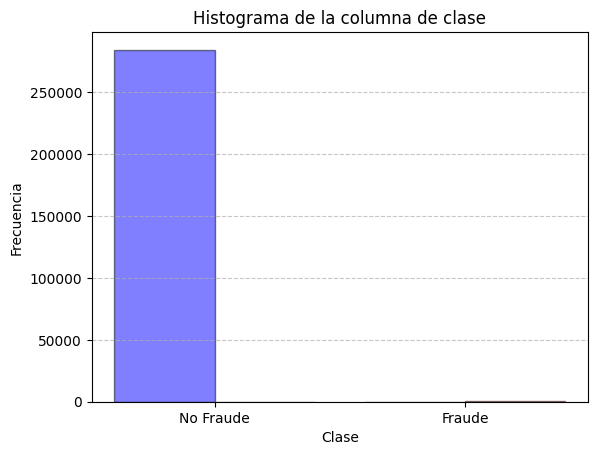

In [4]:
# Separando los datos en dos grupos: "No Fraude" y "Fraude"
no_fraude = df[df["Class"] == 0]
fraude = df[df["Class"] == 1]

# Contando el número de observaciones en cada grupo
print("No Fraude:", len(no_fraude))
print("Fraude:", len(fraude))

# Creando el histrograma
plt.hist([no_fraude["Class"], fraude["Class"]], bins=[0, 1, 2], alpha=0.5, color=['blue', 'red'], edgecolor='k')

# Personalizando el gráfico
plt.title("Histograma de la columna de clase")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks([0.5, 1.5], ["No Fraude", "Fraude"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrando el histograma
plt.show()

Matriz de correlación

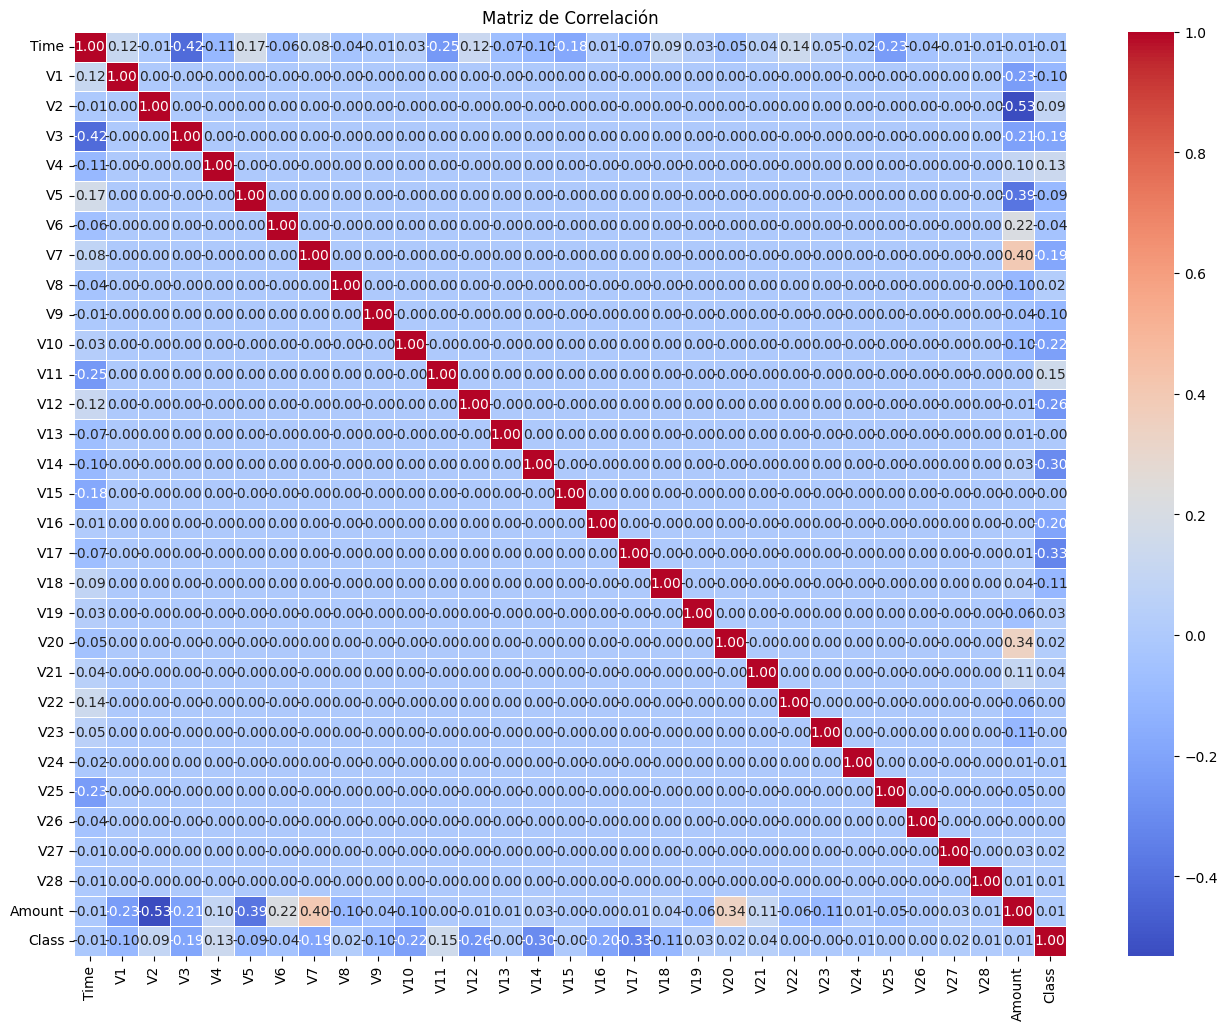

In [5]:
# Calculando la matriz de correlación
correlation_matrix = df.corr()

# Creando un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Histograma de los gastos hechos con las tarjetas

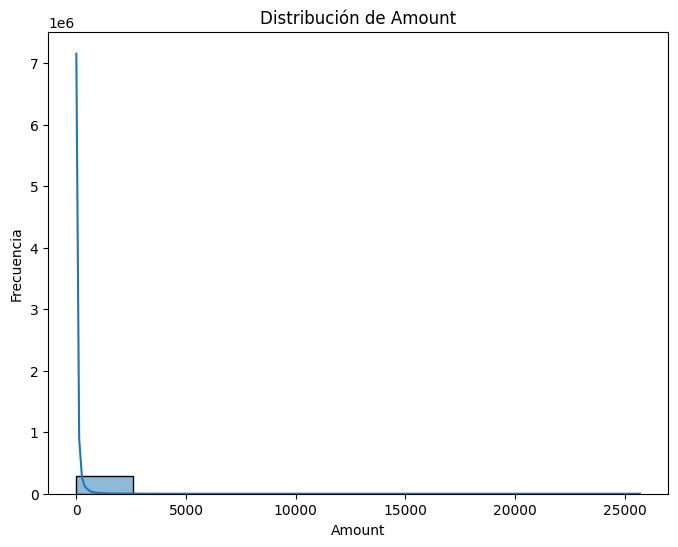

In [6]:
# Histograma de la variable 'Amount'
plt.figure(figsize=(8, 6))
sns.histplot(df["Amount"], bins=10, kde=True)
plt.title("Distribución de Amount")
plt.xlabel("Amount")
plt.ylabel("Frecuencia")
plt.show()

Boxplot de la columna de "Amount"

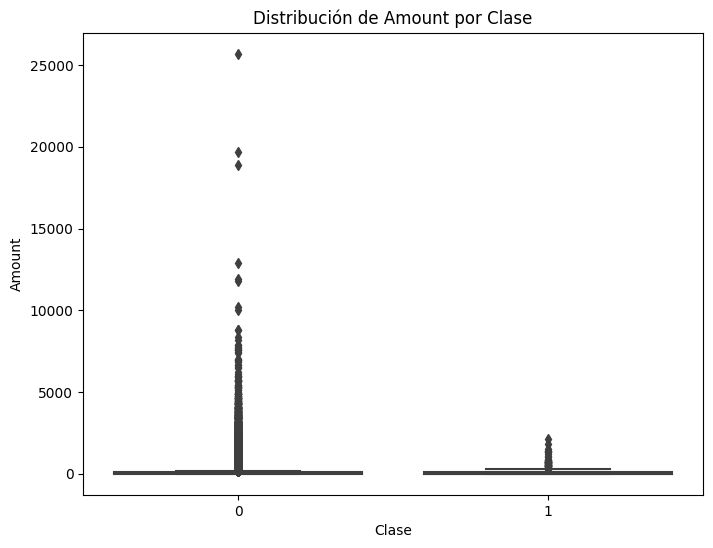

In [7]:
# Boxplot de 'Amount' por clase
plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Distribución de Amount por Clase")
plt.xlabel("Clase")
plt.ylabel("Amount")
plt.show()

Gráfico de caja de los componentes del dataset

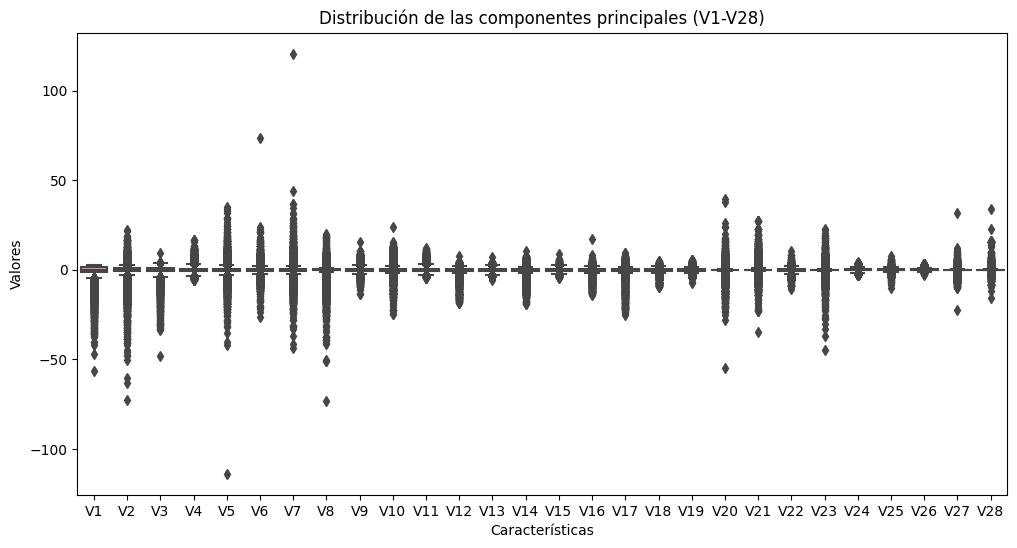

In [8]:
# Gráfico de caja para las principales componentes (V1-V28)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:29])
plt.title("Distribución de las componentes principales (V1-V28)")
plt.xlabel("Características")
plt.ylabel("Valores")
plt.show()  

Densidad del tiempo.

C:\Users\sebas\AppData\Local\Temp\ipykernel_21716\905307346.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Class"] == 0]["Time"], label="No Fraude", shade=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_21716\905307346.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Class"] == 1]["Time"], label="Fraude", shade=True)


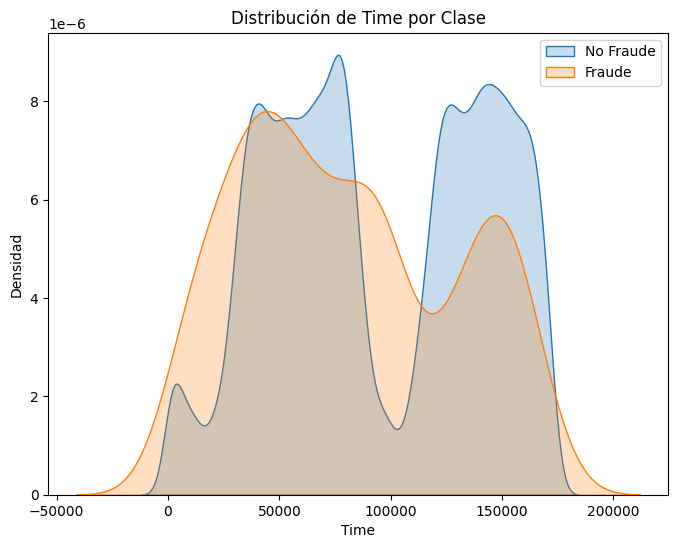

In [9]:
# Gráfico de densidad de 'Time' por tipo de fraude o no fraude
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df["Class"] == 0]["Time"], label="No Fraude", shade=True)
sns.kdeplot(df[df["Class"] == 1]["Time"], label="Fraude", shade=True)
plt.title("Distribución de Time por Clase")
plt.xlabel("Time")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Armando la Red Neuronal

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [11]:
data = pd.read_csv("./archive1/creditcard.csv")

# Separando las características (X) y la variable objetivo (y)
X = data.drop("Class", axis=1)
y = data["Class"]

Aplicando un balance

In [12]:
# Dividiendo el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE a los datos de entrenamiento
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

# Escalando las características (usando StandardScaler)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

print("X_train shape:", X_train_resampled.shape)
print("X_test shape:", X_test_resampled.shape)
print("y_train shape:", y_train_resampled.shape)
print("y_test shape:", y_test_resampled.shape)

X_train shape: (454902, 30)
X_test shape: (113728, 30)
y_train shape: (454902,)
y_test shape: (113728,)


Creando el modelo

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

def positive_predictive_value(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    
    true_positives = tf.reduce_sum(y_true * y_pred)
    predicted_positives = tf.reduce_sum(y_pred)
    
    ppv = true_positives / (predicted_positives + 1e-8)  # Evita la división por cero
    
    return ppv

# Compilando el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[positive_predictive_value])

Entrenando el modelo

In [14]:
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test_resampled, y_test_resampled))

Epoch 1/10
7108/7108 [==============================] - 20s 3ms/step - loss: 0.0509 - positive_predictive_value: 0.9872 - val_loss: 0.5069 - val_positive_predictive_value: 0.5369
Epoch 2/10
7108/7108 [==============================] - 19s 3ms/step - loss: 0.0090 - positive_predictive_value: 0.9964 - val_loss: 1.0574 - val_positive_predictive_value: 0.5395
Epoch 3/10
7108/7108 [==============================] - 20s 3ms/step - loss: 0.0052 - positive_predictive_value: 0.9979 - val_loss: 1.2644 - val_positive_predictive_value: 0.5383
Epoch 4/10
7108/7108 [==============================] - 20s 3ms/step - loss: 0.0041 - positive_predictive_value: 0.9984 - val_loss: 1.4105 - val_positive_predictive_value: 0.5393
Epoch 5/10
7108/7108 [==============================] - 19s 3ms/step - loss: 0.0031 - positive_predictive_value: 0.9987 - val_loss: 1.7120 - val_positive_predictive_value: 0.5405
Epoch 6/10
7108/7108 [==============================] - 19s 3ms/step - loss: 0.0027 - positive_predictive

Enseñando los resultados

In [20]:
y_pred = model.predict(X_test_resampled)

#print("y_pred shape:", y_pred)

y_pred = (y_pred > 0.5)  # Convirtiendo las probabilidades en etiquetas binarias

#print("y_pred:", y_pred)

conf_matrix = confusion_matrix(y_test_resampled, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calculando métricas de evaluación
precision, recall, _ = precision_recall_curve(y_test_resampled, y_pred)
auprc = auc(recall, precision)
classification_rep = classification_report(y_test_resampled, y_pred)
print(f"AUPRC: {auprc}")
print("Informe de Clasificación:")
print(classification_rep)

3554/3554 [==============================] - 6s 2ms/step
Matriz de Confusión:
[[56786    78]
 [ 9910 46954]]
AUPRC: 0.9556019112766816
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     56864
           1       1.00      0.83      0.90     56864

    accuracy                           0.91    113728
   macro avg       0.92      0.91      0.91    113728
weighted avg       0.92      0.91      0.91    113728

